# Lab 8: Define and Solve an ML Problem of Your Choosing

In [179]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [180]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [181]:
df.shape

(28022, 50)

In [182]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. The data set I have chosen is the Airbnb NYC Listings Set.
2. I will be predicting if a new listing would receive high reviews based on its features. The label is review_scores_value.
3. The problem is a supervised regression problem.
4. The features for the problem will be host_response_rate, host_acceptance_rate, review_scores_rating, room_type, accommodates, and instant_bookable.
5. This model can create value for Airbnb by predicting which listings are likely to receive high review scores, helping the company guide hosts on how to improve their listings and providing insights to prioritize high-quality listings on the platform.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

1. The data preparation techniques I would like to use are:
    Addressing missingness
    Finding and replacing outliers
    Removing constant features
    Encode the categorical variables
3. I will use Random Forest Regressor first and then see from there but definitely will incorporate one-hot encoding.
4. I will evaluate the model with Root Mean Squared Error and Mean Absolute Errory and improve the performance with editing hgyperparameters and removing the irrelevant features that mess with the performance.

In [183]:
df.shape

(28022, 50)

In [184]:
df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,16179.000000,16909.000000,28022.000000,28022.000000,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,0.906901,0.791953,14.554778,14.554778,2.874491,1.142174,1.329708,1.629556,154.228749,18.689387,...,4.814300,4.808041,4.750393,4.647670,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,0.227282,0.276732,120.721287,120.721287,1.860251,0.421132,0.700726,1.097104,140.816605,25.569151,...,0.438603,0.464585,0.415717,0.518023,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.940000,0.680000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,...,4.810000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,1.000000,0.910000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,115.000000,30.000000,...,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,180.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000
max,1.000000,1.000000,3387.000000,3387.000000,16.000000,8.000000,12.000000,21.000000,1000.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000,13.000000


In [185]:
df['review_scores_value']

0        4.41
1        4.64
2        5.00
3        4.36
4        4.92
         ... 
28017    1.00
28018    5.00
28019    2.00
28020    5.00
28021    5.00
Name: review_scores_value, Length: 28022, dtype: float64

In [186]:
df["review_scores_value"].unique()[:15]

array([4.41, 4.64, 5.  , 4.36, 4.92, 4.73, 4.57, 4.84, 4.78, 4.8 , 4.75,
       4.58, 4.34, 4.9 , 4.63])

In [219]:
#remove missing rows
df = df.dropna(subset=['review_scores_value'])

In [188]:
#checking data types of columns
df.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

In [189]:
#dropping constant columns and the label col
bool_constant_cols = [
    col for col in df.columns
    if df[col].dtype == 'bool' and df[col].nunique() == 1
]

In [190]:
label = 'review_scores_value'

In [191]:
df.drop(columns=bool_constant_cols, inplace=True)

In [192]:
df.shape

(28022, 47)

In [193]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'c

In [194]:
#handling outliers
import scipy.stats as stats

In [195]:
label = 'review_scores_value'
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(label)

In [196]:
changed_columns = []

In [197]:
for col in numeric_cols:
    winsorized = stats.mstats.winsorize(df[col], limits=[0.01, 0.01])
    
    if (df[col] - winsorized != 0).any():
        changed_columns.append(col)
    
    df[col] = winsorized

print("Winsorization applied. Columns with outliers found are:")
print(changed_columns)

Winsorization applied. Columns with outliers found are:
['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'n_host_verifications']


In [198]:
#handling missing data
nan_count = np.sum(df.isnull(), axis=0)
nan_count

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_listings_count                                 0
host_total_listings_count                           0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                                             1354
amenities                                           0
price                                               0
minimum_nights              

In [199]:
nan_detected = nan_count != 0
nan_detected

name                                             True
description                                      True
neighborhood_overview                            True
host_name                                       False
host_location                                    True
host_about                                       True
host_response_rate                               True
host_acceptance_rate                             True
host_listings_count                             False
host_total_listings_count                       False
neighbourhood_group_cleansed                    False
room_type                                       False
accommodates                                    False
bathrooms                                       False
bedrooms                                         True
beds                                             True
amenities                                       False
price                                           False
minimum_nights              

In [200]:
is_int_or_float = df.dtypes.isin(['int64', 'float64'])
is_int_or_float

name                                            False
description                                     False
neighborhood_overview                           False
host_name                                       False
host_location                                   False
host_about                                      False
host_response_rate                              False
host_acceptance_rate                            False
host_listings_count                             False
host_total_listings_count                       False
neighbourhood_group_cleansed                    False
room_type                                       False
accommodates                                    False
bathrooms                                       False
bedrooms                                        False
beds                                            False
amenities                                       False
price                                           False
minimum_nights              

In [201]:
to_impute = nan_detected & is_int_or_float
to_impute

name                                            False
description                                     False
neighborhood_overview                           False
host_name                                       False
host_location                                   False
host_about                                      False
host_response_rate                              False
host_acceptance_rate                            False
host_listings_count                             False
host_total_listings_count                       False
neighbourhood_group_cleansed                    False
room_type                                       False
accommodates                                    False
bathrooms                                       False
bedrooms                                        False
beds                                            False
amenities                                       False
price                                           False
minimum_nights              

In [202]:
df.columns[to_impute]

Index([], dtype='object')

#### this shows that there was no missing data

In [203]:
#one-hot encoding for the categorical cols now
df.select_dtypes(include='object').nunique().sort_values()

room_type                           4
neighbourhood_group_cleansed        5
host_location                    1364
host_name                        7566
host_about                      11962
neighborhood_overview           15800
amenities                       25020
description                     25952
name                            27386
dtype: int64

In [204]:
for col in df.select_dtypes(include='object').columns:
    print(f"df['{col}'].unique()")
    print(df[col].unique())
    print()

df['name'].unique()
['Skylit Midtown Castle'
 'Whole flr w/private bdrm, bath & kitchen(pls read)'
 'Spacious Brooklyn Duplex, Patio + Garden' ...
 'Perfect Room to Stay in Brooklyn! Near Metro!'
 'New Beautiful Modern One Bedroom in Brooklyn'
 'Large, modern, private 1 bedroom in beach condo']

df['description'].unique()
['Beautiful, spacious skylit studio in the heart of Midtown, Manhattan. <br /><br />STUNNING SKYLIT STUDIO / 1 BED + SINGLE / FULL BATH / FULL KITCHEN / FIREPLACE / CENTRALLY LOCATED / WiFi + APPLE TV / SHEETS + TOWELS<br /><br /><b>The space</b><br />- Spacious (500+ft²), immaculate and nicely furnished & designed studio.<br />- Tuck yourself into the ultra comfortable bed under the skylight. Fall in love with a myriad of bright lights in the city night sky. <br />- Single-sized bed/convertible floor mattress with luxury bedding (available upon request).<br />- Gorgeous pyramid skylight with amazing diffused natural light, stunning architectural details, soaring high

#### the features that should be one-hot encoded are neighbourhood_group_cleansed & room_type.

In [206]:
room_type_encoded = pd.get_dummies(df['room_type'], prefix='room_type')
df = df.drop('room_type', axis=1)
df = pd.concat([df, room_type_encoded], axis=1)

In [207]:
neighbourhood_group_cleansed_encoded = pd.get_dummies(df['neighbourhood_group_cleansed'], prefix='neighbourhood_group_cleansed')
df = df.drop('neighbourhood_group_cleansed', axis=1)
df = pd.concat([df, neighbourhood_group_cleansed_encoded], axis=1)

In [208]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       

In [209]:
#exploring data
corr_matrix = round(df.corr(), 5)
corr_matrix

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,n_host_verifications,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island
host_response_rate,1.00000,0.50570,0.07111,0.07111,0.02818,0.02325,0.01856,0.02493,0.00777,-0.20966,...,0.02375,0.03851,-0.01868,-0.02878,-0.03005,0.02611,0.02318,-0.06575,0.03776,0.01726
host_acceptance_rate,0.50570,1.00000,0.00470,0.00470,0.06848,-0.00219,0.02250,0.03963,0.03962,-0.25915,...,-0.07057,-0.00715,0.04155,0.00236,-0.00941,0.03050,-0.04077,-0.01312,0.05113,0.01299
host_listings_count,0.07111,0.00470,1.00000,1.00000,-0.04852,-0.00259,-0.03689,-0.06180,0.02675,0.08602,...,0.07585,-0.02357,0.01480,0.02688,-0.02257,-0.02822,-0.15401,0.13020,0.05207,-0.02069
host_total_listings_count,0.07111,0.00470,1.00000,1.00000,-0.04852,-0.00259,-0.03689,-0.06180,0.02675,0.08602,...,0.07585,-0.02357,0.01480,0.02688,-0.02257,-0.02822,-0.15401,0.13020,0.05207,-0.02069
accommodates,0.02818,0.06848,-0.04852,-0.04852,1.00000,0.34558,0.74065,0.76922,0.51622,-0.10380,...,-0.01967,0.47910,-0.01521,-0.46340,-0.06811,-0.01010,0.02822,-0.02400,-0.00519,0.01530
bathrooms,0.02325,-0.00219,-0.00259,-0.00259,0.34558,1.00000,0.45627,0.37165,0.31074,-0.01903,...,0.00823,0.01574,-0.01951,-0.01304,-0.00014,-0.02108,0.07336,-0.04992,-0.02382,0.00557
bedrooms,0.01856,0.02250,-0.03689,-0.03689,0.74065,0.45627,1.00000,0.75719,0.48116,-0.05705,...,-0.02417,0.37423,-0.02984,-0.35665,-0.05833,-0.01336,0.05907,-0.05547,-0.00454,0.01769
beds,0.02493,0.03963,-0.06180,-0.06180,0.76922,0.37165,0.75719,1.00000,0.41474,-0.09179,...,-0.02724,0.33719,-0.01589,-0.34037,0.01644,0.00730,0.02227,-0.05963,0.03879,0.03676
price,0.00777,0.03962,0.02675,0.02675,0.51622,0.31074,0.48116,0.41474,1.00000,-0.14314,...,-0.02576,0.35682,0.12797,-0.36479,-0.05070,-0.07365,-0.11341,0.24194,-0.13518,-0.03770
minimum_nights,-0.20966,-0.25915,0.08602,0.08602,-0.10380,-0.01903,-0.05705,-0.09179,-0.14314,1.00000,...,0.09781,0.05848,-0.05669,-0.04782,-0.01263,-0.07275,-0.01186,0.11186,-0.09047,-0.05249


In [211]:
corrs = corr_matrix['review_scores_value']
corrs

host_response_rate                              0.09078
host_acceptance_rate                            0.01025
host_listings_count                            -0.14281
host_total_listings_count                      -0.14281
accommodates                                   -0.00727
bathrooms                                      -0.01185
bedrooms                                        0.00039
beds                                           -0.00882
price                                          -0.00489
minimum_nights                                 -0.06511
maximum_nights                                 -0.02650
minimum_minimum_nights                         -0.06729
maximum_minimum_nights                         -0.07014
minimum_maximum_nights                         -0.02115
maximum_maximum_nights                         -0.02238
minimum_nights_avg_ntm                         -0.07093
maximum_nights_avg_ntm                         -0.02147
has_availability                                

In [212]:
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted

review_scores_value                             1.00000
review_scores_rating                            0.81040
review_scores_communication                     0.66455
review_scores_cleanliness                       0.66048
review_scores_checkin                           0.60790
review_scores_location                          0.54164
host_response_rate                              0.09078
number_of_reviews                               0.08866
number_of_reviews_l30d                          0.08001
number_of_reviews_ltm                           0.06845
neighbourhood_group_cleansed_Brooklyn           0.06449
reviews_per_month                               0.06155
room_type_Entire home/apt                       0.04465
n_host_verifications                            0.04093
neighbourhood_group_cleansed_Staten Island      0.02021
has_availability                                0.01367
host_acceptance_rate                            0.01025
neighbourhood_group_cleansed_Bronx              

In [213]:
top_two_corr = list(corrs_sorted.index[1:3])
top_two_corr

['review_scores_rating', 'review_scores_communication']

In [214]:
df_corrs = df[['review_scores_value'] + top_two_corr]
df_corrs

,review_scores_value,review_scores_rating,review_scores_communication
0,4.41,4.70,4.79
1,4.64,4.45,4.80
2,5.00,5.00,5.00
3,4.36,4.21,4.42
4,4.92,4.91,4.95
...,...,...,...
28017,1.00,5.00,5.00
28018,5.00,5.00,5.00
28019,2.00,2.00,5.00
28020,5.00,5.00,5.00


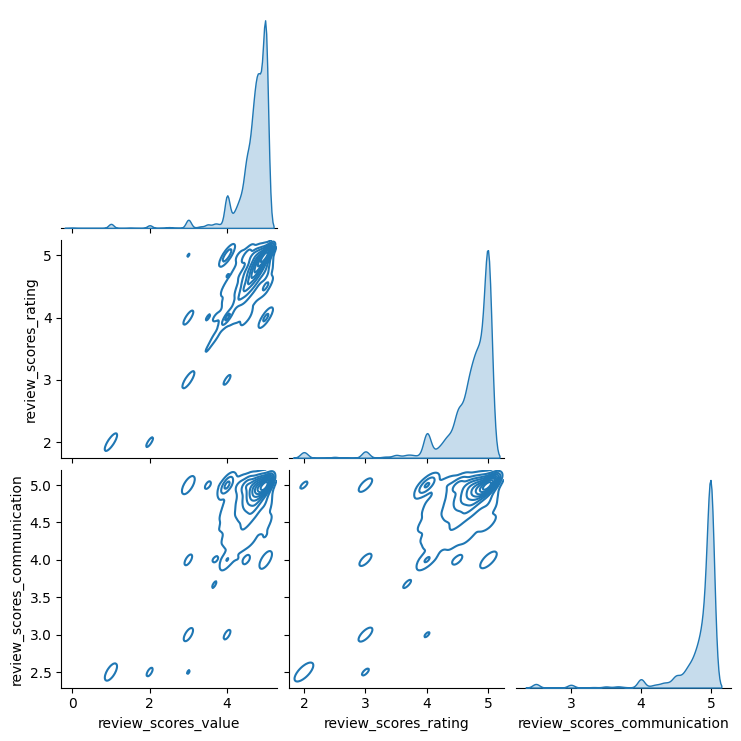

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_corrs, kind='kde', corner=True)
plt.show()

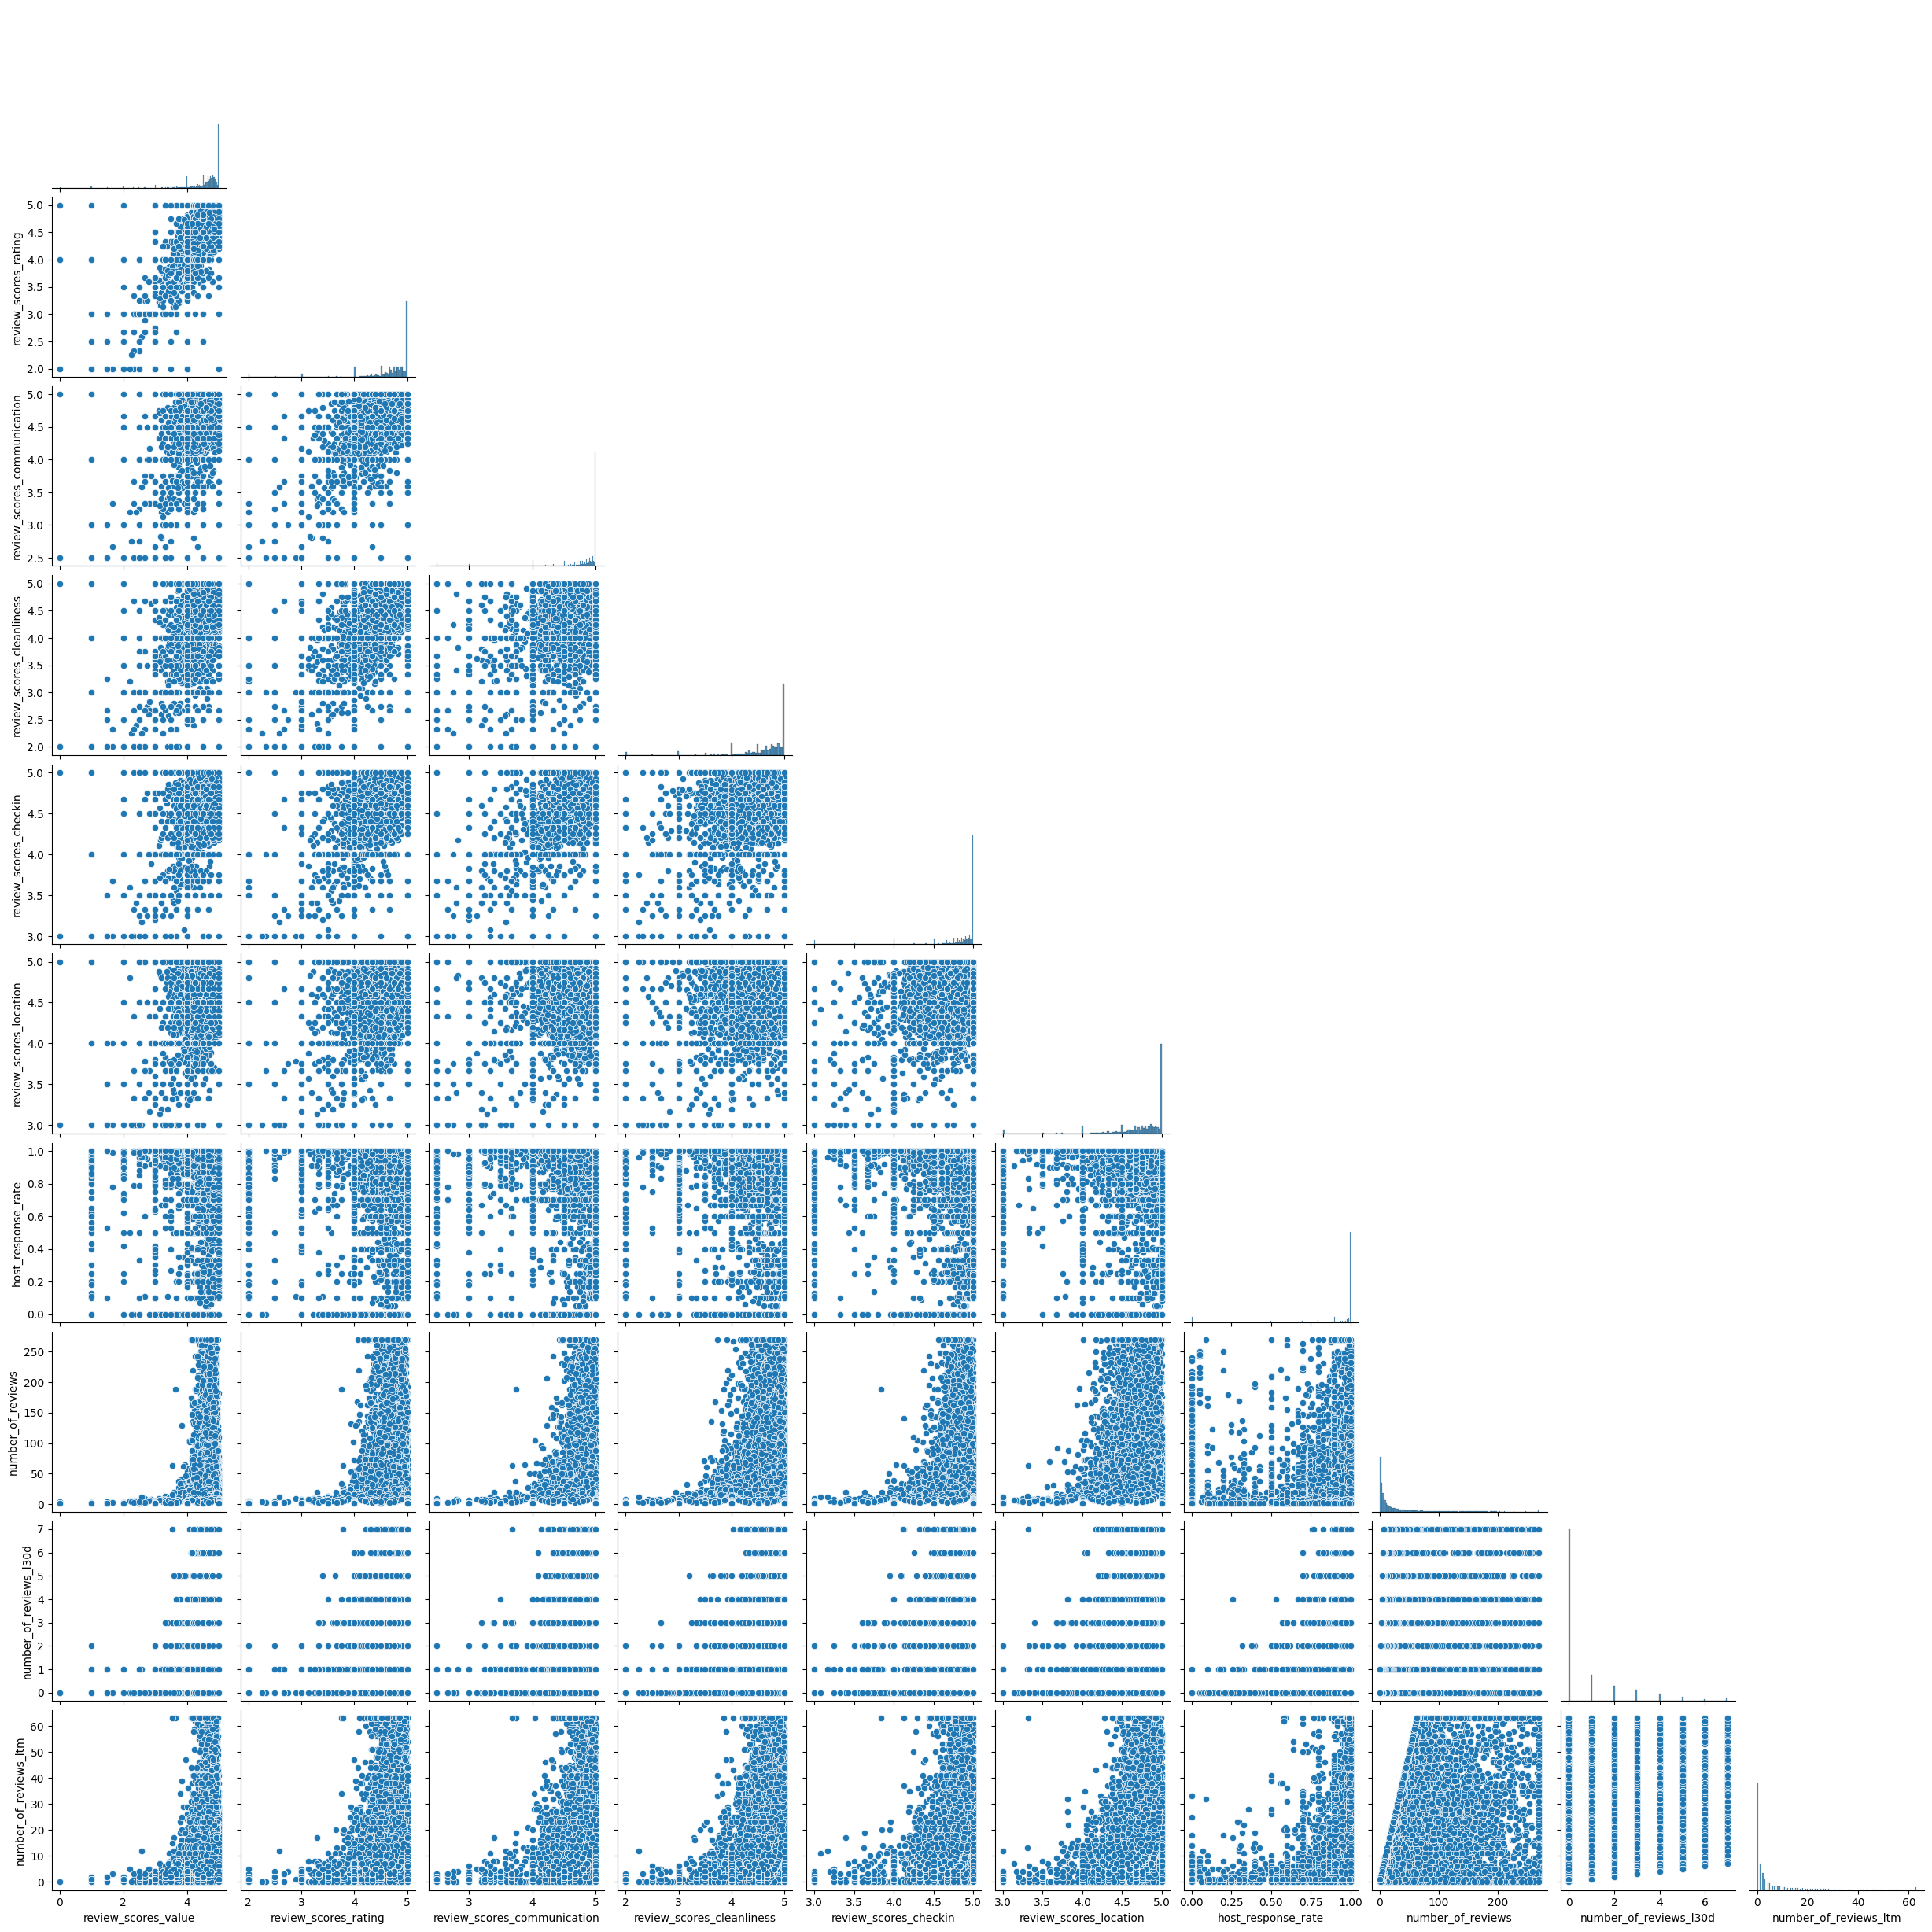

In [218]:
features_to_plot = [
    'review_scores_value',
    'review_scores_rating',
    'review_scores_communication',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_location',
    'host_response_rate',
    'number_of_reviews',
    'number_of_reviews_l30d',
    'number_of_reviews_ltm'
]

df_top = df[features_to_plot]

sns.pairplot(df_top, kind='scatter', corner=True)
plt.show()

#### interpreting the plots:
The host_response_rate plots look similar to a constant, so that feature wouldn't be useful.
The rest mostly have a high correlation between review-related features which can help when predicting.

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

My plan to implement the remaining phases of the ML life cycle to solve my ML problem is as follows:
Yes, I have a new feature list, which is review_scores_rating, review_scores_cleanliness, review_scores_communication, review_scores_checkin, review_scores_location, log_number_of_reviews, and log_number_of_reviews_l30d. I chose them because, after analyzing the scatter plots, it made the most sense to use these features that had high correlations with my label.

I don't need much additional data prep, but I will address any more missingness, add log transformation, and then split the sets to train and test them.

I will build two models, one with 7 predictors and the other with 2, and will first try linear regression, but I am open to Random Forest if that works better.

My plan to train my models is to first evaluate two different amounts of predictors using R^2 and RMSE, and then compare which one performs better. Based on the model that performs better, I will tune the hyperparameters.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [220]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

#### preparing data

In [221]:
y = df['review_scores_value']

In [222]:
#log transformation
df['log_number_of_reviews'] = np.log1p(df['number_of_reviews'])
df['log_number_of_reviews_l30d'] = np.log1p(df['number_of_reviews_l30d'])

In [223]:
#the 7 predictors
features_7 = [
    'review_scores_rating',
    'review_scores_cleanliness',
    'review_scores_communication',
    'review_scores_checkin',
    'review_scores_location',
    'log_number_of_reviews',
    'log_number_of_reviews_l30d'
]

In [224]:
#the 2 predictors
features_2 = [
    'review_scores_rating',
    'log_number_of_reviews'
]

In [225]:
#x matrices
X_7 = df[features_7]
X_2 = df[features_2]

In [226]:
#addressing missing values
X_7 = X_7.dropna()
X_2 = X_2.dropna()
y = y.loc[X_7.index]  # ensure alignment after dropping rows

In [227]:
#splitting into train and test sets
X7_train, X7_test, y_train, y_test = train_test_split(X_7, y, test_size=0.2, random_state=42)
X2_train, X2_test, _, _ = train_test_split(X_2, y, test_size=0.2, random_state=42)

In [228]:
X7_train.shape, X7_test.shape
X2_train.shape, X2_test.shape

((22417, 2), (5605, 2))

#### fitting and evaluating model

In [229]:
lr = LinearRegression()

In [230]:
#model w 7 predictors
lr.fit(X7_train, y_train)
y7_pred = lr.predict(X7_test)

In [232]:
#model w 2 predictors
lr.fit(X2_train, y_train)
y2_pred = lr.predict(X2_test)

In [233]:
#evaluating models with r2 and rmse
def evaluate_model(y_true, y_pred, name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{name} -> R²: {r2:.4f}, RMSE: {rmse:.4f}")

In [234]:
evaluate_model(y_test, y7_pred, "7 predictors")
evaluate_model(y_test, y2_pred, "2 predictors")

7 predictors -> R²: 0.6682, RMSE: 0.3006
2 predictors -> R²: 0.6284, RMSE: 0.3181


### Interpreting the models, the 7-predictor model works better since its r^2 is of 66.8% and has the lower RMSE meaning the mode with 7 features provides a better performance but the model with 2 features definitely still demonstrates the pattern accurately.

In [235]:
rf = RandomForestRegressor(
    n_estimators=200, 
    max_depth=None, 
    random_state=42,
    n_jobs=-1
)

In [236]:
rf.fit(X7_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [237]:
y7_rf_pred = rf.predict(X7_test)

In [239]:
evaluate_model(y_test, y7_rf_pred, "7F RF")

7F RF -> R²: 0.6376, RMSE: 0.3142


#### The Linear Regression model had a better performance than the RF model meaning that the relationship between these features is more linear and not complex or non linear enough for RF to perform successfully.

### In conclusion: I identified the most important predictors for review_scores_value to be review-based metrics (rating, cleanliness, communication, check-in, and location), along with the log-transformed counts of reviews. I had compared the dataset with two modeling approaches: Linear Regression and Random Forest, and I also compared using a reduced feature set (2 predictors) versus a full feature set (7 predictors).

### The results showed that the Linear Regression model with 7 predictors performed the best, achieving an R² of approximately 0.67 and an RMSE of 0.30. The Random Forest model did not outperform the linear model, likely because the relationships between these predictors and the target are largely linear.

### This analysis highlights that the review score patterns can be effectively predicted using a small set of review-related features, and that simpler models can also generalize well when the relationships in the data are straightforward. Further improvements could involve tuning models with cross-validation or testing regularized regression methods, but the current results already provide a clear and interpretable model for predicting review scores.